<a href="https://colab.research.google.com/github/Raizel820/Raizel820-Capstone_Project_Machine_Learning/blob/master/Capstone_Project_Complete_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import subprocess as sp
import sys,os,shutil,pickle,time
from os.path import join
# mount Google Drive
from os.path import expanduser
gd_path=join(expanduser("~"),'gd')
if not os.path.isdir(gd_path):
    try:
        # load Google Drive
        from google.colab import drive,files
        drive.mount('/drive')
        sp.call('ln -s /drive/My\ Drive '+gd_path, shell=True)
    except:
        print('unable to find Google Drive Folder')
os.chdir(gd_path+'/MachineLearning/car_data')
os.listdir('.')

['craigslistVehicles_full.csv', 'cars_cleaned.csv']

In [0]:
import pandas as pd
import numpy as np

In [49]:
df = pd.read_csv('cars_cleaned.csv')
df.head(5)

,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,9000,2009.0,chevrolet,suburban lt2,good,8 cylinders,gas,217743.0,clean,automatic,rwd,full-size,SUV,white
1,6000,2002.0,gmc,sierra 1500,good,8 cylinders,gas,195000.0,clean,automatic,4wd,full-size,pickup,white
2,37000,2012.0,chevrolet,3500,excellent,8 cylinders,diesel,178000.0,clean,automatic,4wd,full-size,pickup,silver
3,3700,2003.0,chevrolet,F150,fair,8 cylinders,gas,269000.0,clean,automatic,4wd,full-size,pickup,silver
4,19950,2013.0,ford,f-250,good,8 cylinders,gas,116792.0,clean,automatic,4wd,full-size,pickup,white


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375332 entries, 0 to 375331
Data columns (total 14 columns):
price           375332 non-null int64
year            375332 non-null float64
manufacturer    375332 non-null object
make            375332 non-null object
condition       375332 non-null object
cylinders       375332 non-null object
fuel            375332 non-null object
odometer        375332 non-null float64
title_status    375332 non-null object
transmission    375332 non-null object
drive           375332 non-null object
size            375332 non-null object
type            375332 non-null object
paint_color     375332 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 40.1+ MB


**Label Processing**

In [0]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

df[['manufacturer', 'make', 'condition', 'cylinders','fuel','title_status', 'transmission','drive','size','type','paint_color']] = df[['manufacturer', 'make', 'condition','cylinders', 'fuel','title_status', 'transmission','drive','size','type','paint_color']].apply(le.fit_transform)
#df['city'] = le.fit(df['city'])

Split Train and Test data

In [51]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

y= df.price
X= df.drop('price',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(300265, 13) (300265,)
(75067, 13) (75067,)


**Standard Scaler**: It assumes that your data is normally distributed within each feature. This is **not appropriate** for this data

In [0]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

**Min-max scaler:**

For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum.

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()   
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [53]:
X_train

array([[0.94117647, 0.85      , 0.01793642, ..., 0.33333333, 0.66666667,
        0.81818182],
       [0.76470588, 0.175     , 0.30864242, ..., 0.33333333, 0.16666667,
        0.90909091],
       [0.88235294, 0.4       , 0.33595876, ..., 0.33333333, 0.75      ,
        0.72727273],
       ...,
       [0.5       , 0.575     , 0.44142919, ..., 0.66666667, 0.75      ,
        0.45454545],
       [0.58823529, 0.4       , 0.37985107, ..., 0.66666667, 0.        ,
        0.81818182],
       [0.85294118, 0.175     , 0.43706143, ..., 0.66666667, 0.        ,
        0.72727273]])

 **Random Forest**

In [0]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [0]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

In [10]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 2199.48
Mean Squared Error: 16843482.83
Root Mean Squared Error: 4104.08


Let's increase number of tress from 20 to 200

In [0]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [12]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 2122.92
Mean Squared Error: 16014408.04
Root Mean Squared Error: 4001.8


With more trees, the model accuracy has increased slightly **(86.11% vs 86.79%)**

Visulization

In [0]:
# Visualizing a Single Decision Tree

# Import tools needed for visualization
rf= regressor
features= df.drop('price', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

In [0]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot',
                feature_names = feature_list, rounded = True, precision = 1, proportion = False, filled= True)

(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');



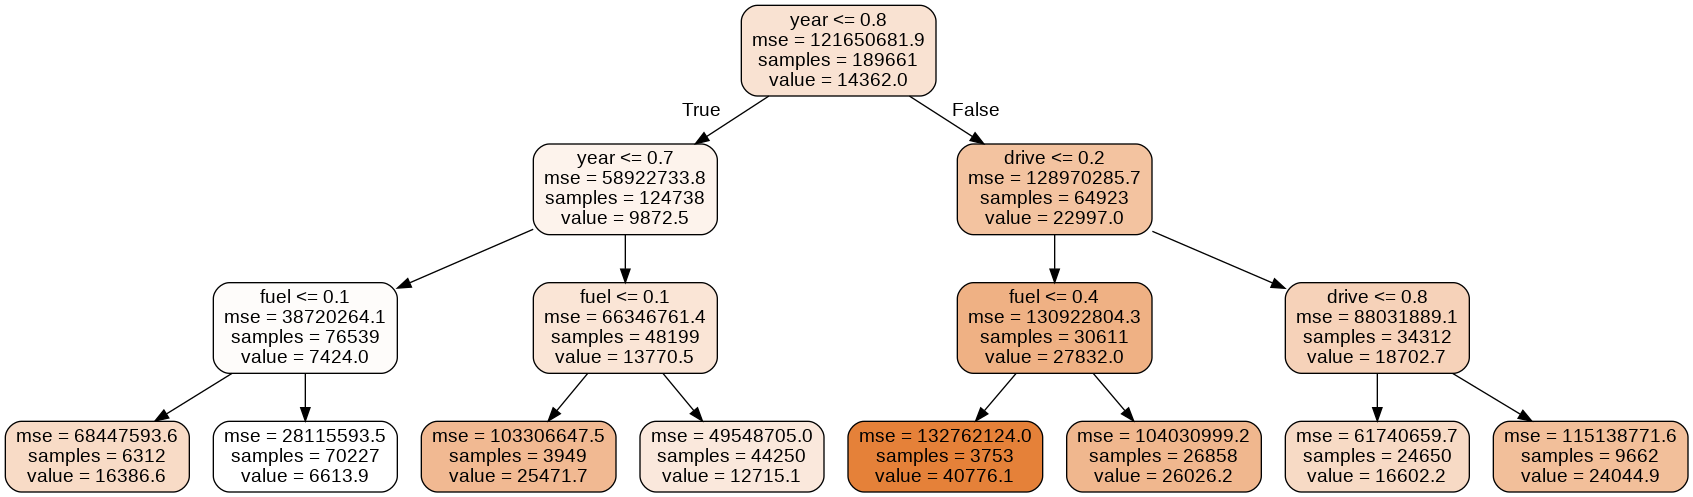

In [0]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'small_tree.png')

**Variable Importance**

In [56]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: year                 Importance: 0.4
Variable: odometer             Importance: 0.13
Variable: make                 Importance: 0.11
Variable: drive                Importance: 0.1
Variable: fuel                 Importance: 0.09
Variable: manufacturer         Importance: 0.05
Variable: cylinders            Importance: 0.04
Variable: type                 Importance: 0.02
Variable: paint_color          Importance: 0.02
Variable: condition            Importance: 0.01
Variable: title_status         Importance: 0.01
Variable: transmission         Importance: 0.01
Variable: size                 Importance: 0.01


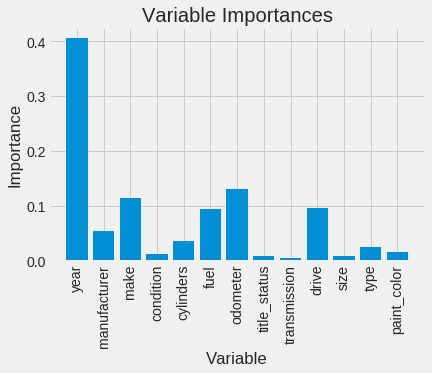

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

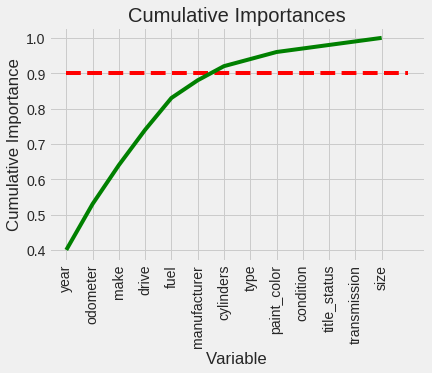

In [58]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 90% of importance retained
plt.hlines(y = 0.90, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance');
plt.title('Cumulative Importances');

In [59]:
# Find number of features for cumulative importance of 90%

# Add 1 because Python is zero-indexed
print('Number of features for 90% importance:', np.where(cumulative_importances > 0.90)[0][0] + 1)

Number of features for 90% importance: 7


New Random Forest with the most important seven features

In [0]:
# New random forest with only the most important variables
from sklearn.ensemble import RandomForestRegressor
rf_most_important = RandomForestRegressor(n_estimators=200, random_state=0)

In [0]:
# Extract the most important features
features= df.drop('price', axis = 1)

# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)


important_indices = [feature_list.index('year'), feature_list.index('drive'), 
                     feature_list.index('odometer'), feature_list.index('fuel'),
                     feature_list.index('make'), feature_list.index('cylinders'), feature_list.index('manufacturer')]
train_important = X_train[:, important_indices]
test_important = X_test[:, important_indices]

In [62]:
# Train the random forest
rf_most_important.fit(train_important, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

Make pedictions with this filtered model

In [0]:
predictions = rf_most_important.predict(test_important)

In [64]:
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predictions),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, predictions),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),2))

Mean Absolute Error: 2047.74
Mean Squared Error: 15682494.73
Root Mean Squared Error: 3960.11


This accuracy is slightly better than the full model (86.79 % vs 87.07). In addition, we this accuracy was obtained just by using 7 features instead of 13. Therefore, it can be considered as an improvement in both accuracy and efficiency.



---



---



# Ridge Regression

In [0]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

First, linear regression will be applied
###Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error as mse
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
rmse_lr = np.sqrt(mse(y_test, y_pred_lr))
rr = Ridge()
rr.fit(X_train, y_train)
y_pred_rr = rr.predict(X_test)
rmse_rr = np.sqrt(mse(y_test, y_pred_rr))
print('-------------Linear Regression-------------')
print("RMSE = {:.2f}".format((rmse_lr)))
accuracy = lr.score(X_test,y_test)
print('Accuracy = ', accuracy*100,'%')
print('-------------Ridge Regression--------------')
print("RMSE = {:.2f}".format((rmse_rr)))

-------------Linear Regression-------------
RMSE = 7578.77
Accuracy =  52.62602873481181 %
-------------Ridge Regression--------------
RMSE = 7578.77


In [16]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

#To retrieve the intercept:
print(regressor.intercept_)#For retrieving the slope:
print(regressor.coef_)

5065.034597901995
[ 24408.0009971    -686.18389293     42.93591976   1207.00656648
  12025.87380365 -16482.15731238 -20652.8980096   -5503.7893133
   1240.99082884  -3997.91777084    -49.60690397    403.29977124
    410.79072931]


In [17]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
year,24408.000997
manufacturer,-686.183893
make,42.935920
condition,1207.006566
cylinders,12025.873804
fuel,-16482.157312
odometer,-20652.898010
title_status,-5503.789313
transmission,1240.990829
drive,-3997.917771


In [0]:
OLS_pred= regressor.predict(X_train)

In [20]:
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_train, OLS_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_train, OLS_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_train, OLS_pred)),2))

Mean Absolute Error: 5398.06
Mean Squared Error: 56888661.51
Root Mean Squared Error: 7542.46


Check performance of the OLS on test data

In [0]:
y_pred = regressor.predict(X_test)

In [25]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
round(df1,2)

,Actual,Predicted
23967,5490,7011.43
252949,19988,3791.14
318549,1250,-268.05
375312,3950,11863.52
317221,9000,5877.70
228400,15900,18694.98
211614,57000,26481.44
39076,27989,23169.30
221969,19900,23538.65
326142,14799,9801.11


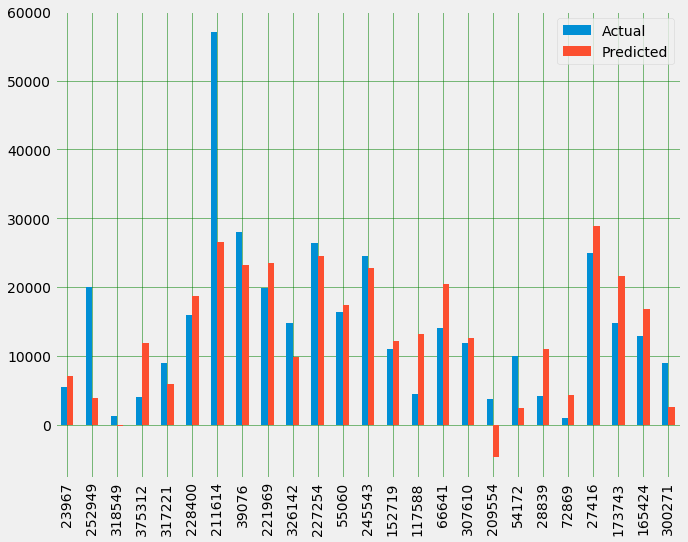

In [0]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Evaluate OLS prediction on test data

In [0]:
y_pred = regressor.predict(X_test)

In [27]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 5406.23
Mean Squared Error: 57437756.47
Root Mean Squared Error: 7578.77


### Ridge Regression

In [0]:
alphas = 10**np.linspace(10,-2,100)*0.5

Text(0, 0.5, 'weights')

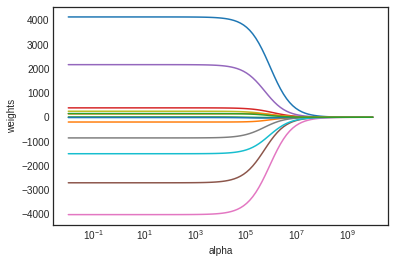

In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn.preprocessing import scale 

%matplotlib inline
plt.style.use('seaborn-white')

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

clf= Ridge()
coefs = []

for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(scale(X_train), y_train)
    coefs.append(clf.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [30]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.005

Finally, we refit our ridge regression model on the full data set, using the value of alpha chosen by cross-validation, and examine the coefficient estimates.

In [31]:
# Fit a ridge regression on the training data
pred2 = ridgecv.predict(X_test)
# Use this model to predict the test data
print(pd.Series(ridgecv.coef_, index = X.columns))

year            24330.482158
manufacturer     -685.577286
make               41.250393
condition        1203.802948
cylinders       11962.323294
fuel           -16392.010951
odometer       -20575.757009
title_status    -5473.016577
transmission     1236.703486
drive           -3984.666869
size              -51.187410
type              405.110962
paint_color       409.573864
dtype: float64


In [32]:
from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, pred2),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, pred2),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, pred2)),2))

Mean Absolute Error: 5405.78
Mean Squared Error: 57436987.51
Root Mean Squared Error: 7578.72


Text(0.5, 1.0, 'Feature importance using Ridge Model')

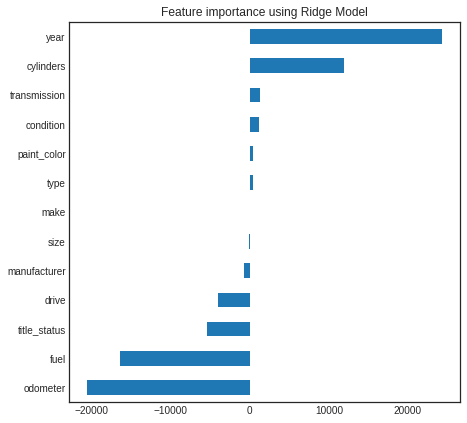

In [0]:
coef_ridge= pd.Series(ridgecv.coef_, index = X.columns)
imp_coef = coef_ridge.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (7.0, 7.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Ridge Model")



---



---



## **LASSO**

In [0]:
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from sklearn import linear_model
from sklearn import datasets
from sklearn.preprocessing import scale 

%matplotlib inline
plt.style.use('seaborn-white')

No handles with labels found to put in legend.


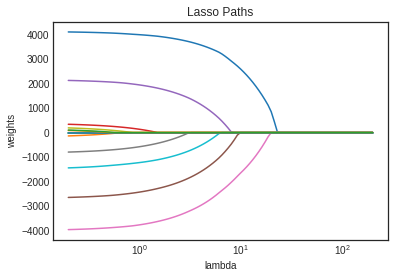

In [34]:
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []
alphas= np.logspace(-1,2,100)
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('lambda')
plt.ylabel('weights')
plt.title('Lasso Paths')
plt.legend()

In [35]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics

reg = LassoCV( alphas = None, cv = 10, max_iter = 100000, normalize = True)
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train,y_train))
coef = pd.Series(reg.coef_, index = X.columns)
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, reg.predict(X_test))),2))

Best alpha using built-in LassoCV: 0.011549
Best score using built-in LassoCV: 0.530637
Root Mean Squared Error: 7578.82


In [0]:
y_pred = reg.predict(X_test)

In [0]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 5406.47
Mean Squared Error: 57438444.92
Root Mean Squared Error: 7578.82
Accuracy: 52.63 %


In [0]:
reg.alpha_

0.011549432679875158

In [0]:
coef

year            24392.050128
manufacturer     -663.263661
make               17.866474
condition        1189.492702
cylinders       12001.377367
fuel           -16443.684403
odometer       -20622.414784
title_status    -5463.502233
transmission     1207.495835
drive           -3980.623690
size              -25.708781
type              384.276198
paint_color       394.627085
dtype: float64

Text(0.5, 1.0, 'Feature importance using Lasso Model')

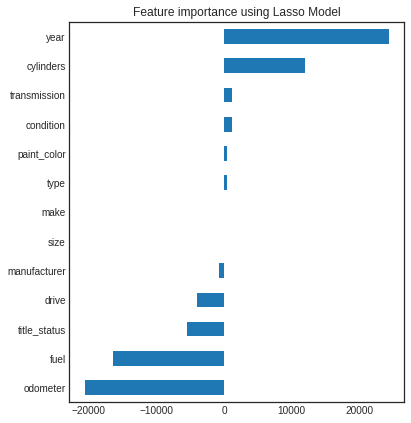

In [0]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 7.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [0]:
lasso001 = Lasso(alpha=100, max_iter=10e5)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)
print ("training score for alpha=100:", train_score001)
print ("test score for alpha =100: ", test_score001)
print ("number of features used: for alpha =100: ", coeff_used001)

training score for alpha=100: 0.5155703090056228
test score for alpha =100:  0.5112134546357787
number of features used: for alpha =100:  7


# KNN

In [0]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import pairwise_distances
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error 

In [0]:
rmse_val2 = [] #to store rmse values for different k
for K in range(15):
    K += 1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test, pred)) #calculate rmse
    rmse_val2.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 6672.487716367083
RMSE value for k=  2 is: 6102.4467442045325
RMSE value for k=  3 is: 5925.696313689232
RMSE value for k=  4 is: 5860.492295447539
RMSE value for k=  5 is: 5826.966000576155
RMSE value for k=  6 is: 5813.454050019631
RMSE value for k=  7 is: 5812.716342211235
RMSE value for k=  8 is: 5821.9579631759525
RMSE value for k=  9 is: 5831.680669411934
RMSE value for k=  10 is: 5840.569037743359
RMSE value for k=  11 is: 5847.09913298263
RMSE value for k=  12 is: 5859.284263911893
RMSE value for k=  13 is: 5869.252038667072
RMSE value for k=  14 is: 5877.502891046304
RMSE value for k=  15 is: 5888.909782297415


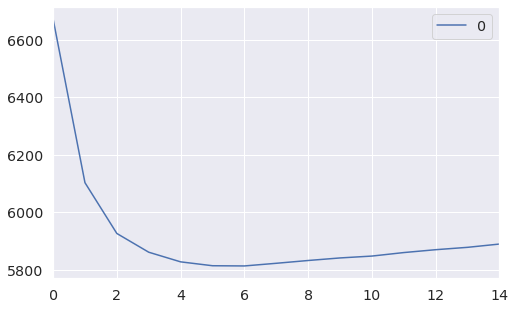

In [0]:
#plotting the rmse values against k values
import seaborn as sns

sns.set(font_scale=1.3)

curve = pd.DataFrame(rmse_val2) #elbow curve 
curve.plot(figsize=(8,5))

######This means that we can make the best prediction by looking at two to six nearest neighbors of a data point. The number depends on the insight of the researcher.

Generating Model for K=6

In [0]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=6)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

Model evaluation

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.10357414043454514


In [0]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
accuracy = knn.score(X_test,y_test)
print("Accuracy:", round(accuracy*100,2),'%')

Mean Absolute Error: 4788.68
Mean Squared Error: 62500378.49
Root Mean Squared Error: 7905.72
Accuracy: 10.36 %


# XGBOOST

In [0]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

In [38]:
import xgboost as xgb

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:27:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 9698.924628


In [39]:
# fit model
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

xg_reg.fit(X_train,y_train)

predictions = xg_reg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:27:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

In [40]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, predictions),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, predictions),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions)),2))

Mean Absolute Error: 6257.07
Mean Squared Error: 94069138.93
Root Mean Squared Error: 9698.92


##K-fold Cross Validation using XGBoost

In [41]:
data_dmatrix = xgb.DMatrix(data=X_train,label=y_train)
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:27:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:27:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:27:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [42]:
A, b = X.iloc[:,:-1],X.iloc[:,-1]
data_dmatrix = xgb.DMatrix(data=A,label=b)

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 3, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[16:27:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:27:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:27:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [43]:
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,6.138402,0.006999,6.138801,0.015581
1,5.802416,0.005503,5.804820,0.015229
2,5.516693,0.003897,5.516724,0.016236
3,5.271581,0.003637,5.271280,0.014906
4,5.063736,0.002896,5.063564,0.014911


In [44]:
print((cv_results["test-rmse-mean"]).tail(1))

49    4.039161
Name: test-rmse-mean, dtype: float64


In [0]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[11:10:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


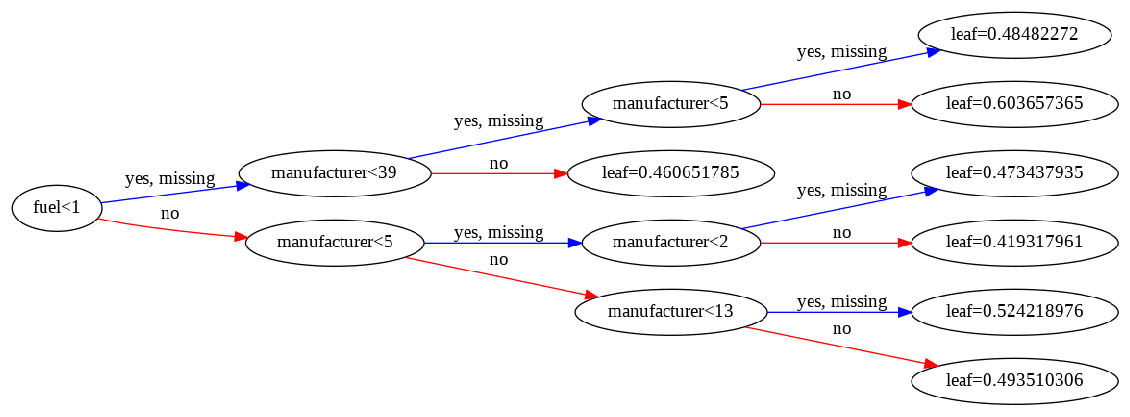

In [0]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,rankdir='LR', num_trees=0)
plt.rcParams['figure.figsize'] = [10,20]
plt.show()

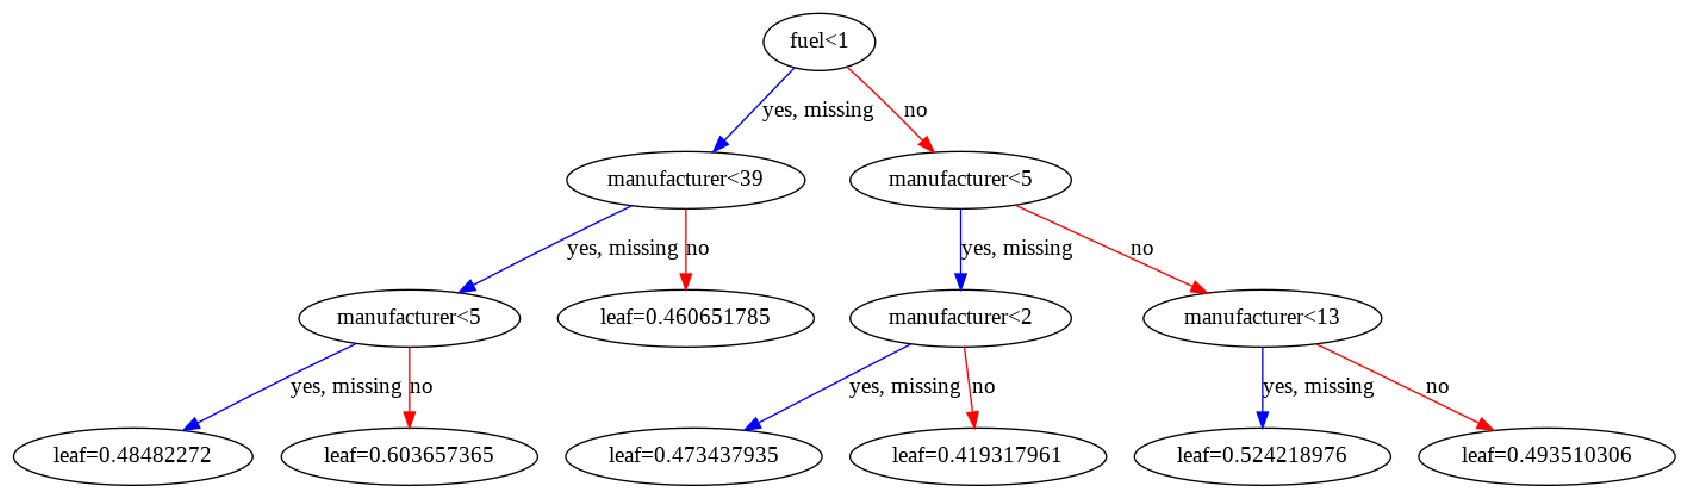

In [0]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [30,30]
plt.show()

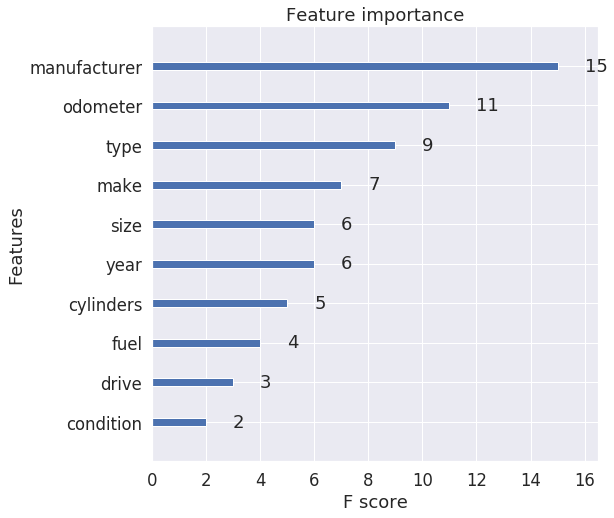

In [0]:
import seaborn as sns
xgb.plot_importance(xg_reg)
sns.set(font_scale=1.5)
plt.rcParams['figure.figsize'] = [8, 8]
plt.show()

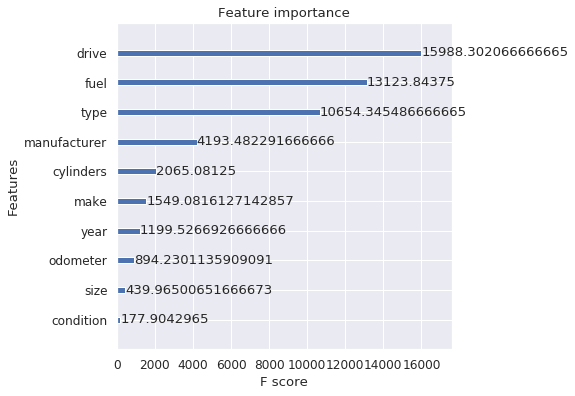

In [0]:
import seaborn as sns
xgb.plot_importance(xg_reg, importance_type= 'gain')
sns.set(font_scale=1.1)
plt.rcParams['figure.figsize'] = [6,6]
plt.show()